# Relevant code for the projects

The following snippets of code perform some of the basic operations required for the projects.

Feel free to modify them, or to use alternative solutions, when you include them in your exercise.

In [1]:
# Loading some relevant librarires
# Note: the installation of the libraries follows the same instruction as the radar exercise
import datetime
import scipy
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## 1. Loading variables from a NetCDF file

Many of the data files provided for the project are in the NetCDF format.
The following lines of code will allnetCDF4 to open the files, list the available variables, and store one (or more) of them in a numpy array.

**Note:** from the code below, only the four arrays defined at the end will be available for the rest of the notebook.

In [3]:
# The example file from the ERA5 reanalysis
input_netcdf_filepath = './Example_data_project/crete_20210709.nc'

# Opening the file using "with":
# The file will be opened and the content is stored in a variable, that we named "input_netcdf_f".
# The file will be closed and the variable "input_netcdf_f" will be deleted once we are outside the indented block.
# We can store all the variables and dimension that we need in numpy arrays, which will be available outside the indented block.
with nc.Dataset(input_netcdf_filepath) as input_netcdf_f:
    # Let's see what's inside the file:
    # 1) dimensions
    dimension_list = input_netcdf_f.dimensions.keys()
    # 2) variables
    variable_list = input_netcdf_f.variables.keys()
    print('Dimensions:\n', dimension_list)
    print('Variables:\n', variable_list)
    
    # If you're curious about a variable, you can show the information avaialble on it
    chosen_var_name = 't2m'
    chosen_var_content = input_netcdf_f[chosen_var_name]
    print('\nInfo about %s:\n' % chosen_var_name, chosen_var_content)
    
    # We can also print some basic information (mostly size) on dimensions
    dimension_time = input_netcdf_f.dimensions['time']
    dimension_lat = input_netcdf_f.dimensions['latitude']
    dimension_lon = input_netcdf_f.dimensions['longitude']
    print('\nInfo about time (as dimensions):\n', dimension_time)
    print('Info about latitude (as dimensions):\n', dimension_lat)
    print('Info about longitude (as dimensions):\n', dimension_lon)
    
    # The values for each dimensions are also stored as variables, let us access and display them
    variable_time = input_netcdf_f.variables['time']
    variable_lat = input_netcdf_f.variables['latitude']
    variable_lon = input_netcdf_f.variables['longitude']
    print('\nInfo about time (as variable):\n', variable_time)
    print('\nInfo about latitude (as variable):\n', variable_lat)
    print('\nInfo about longitud (as variable)e:\n', variable_lon)
    
    # Let us now store the variables that we need in numpy arrays.
    # These arrays will be available outside the current indented block (while the variable "input_netcdf_f" will not).
    time_array = np.array(variable_time)
    lat_array = np.array(variable_lat)
    lon_array = np.array(variable_lon)
    t2m_array = np.array(input_netcdf_f['t2m'])

Dimensions:
 dict_keys(['longitude', 'latitude', 'time'])
Variables:
 dict_keys(['longitude', 'latitude', 'time', 't2m', 'sp'])

Info about t2m:
 <class 'netCDF4._netCDF4.Variable'>
int16 t2m(time, latitude, longitude)
    scale_factor: 0.00016457595791433323
    add_offset: 299.82975169639604
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: 2 metre temperature
unlimited dimensions: 
current shape = (12, 17, 33)
filling on

Info about time (as dimensions):
 <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 12
Info about latitude (as dimensions):
 <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 17
Info about longitude (as dimensions):
 <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 33

Info about time (as variable):
 <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (12,)
filling on, def

## 2. Displaying the variables
We will use the library "matplotlib" to visualize the 2 meter temperature that we extracted from the file.

Since we extracted 3 dimensions (time, latitude, longitude), we will have to select 1 or 2 of them to act as coordinates for plotting the temperature.
We will show how to make two tipes of plots:
- after fixing a specific time step, we can visualize a map of the temperature over a latitude/longitude grid
- after fixing a specific location in space, we can visualize how temperature changes in time

Available time steps:  [1073984 1073985 1073986 1073987 1073988 1073989 1073990 1073991 1073992
 1073993 1073994 1073995]
The first entry in the time array correspond to the date and time:  2022-07-09 08:00:00
All the available date and time steps are:
 [datetime.datetime(2022, 7, 9, 8, 0), datetime.datetime(2022, 7, 9, 9, 0), datetime.datetime(2022, 7, 9, 10, 0), datetime.datetime(2022, 7, 9, 11, 0), datetime.datetime(2022, 7, 9, 12, 0), datetime.datetime(2022, 7, 9, 13, 0), datetime.datetime(2022, 7, 9, 14, 0), datetime.datetime(2022, 7, 9, 15, 0), datetime.datetime(2022, 7, 9, 16, 0), datetime.datetime(2022, 7, 9, 17, 0), datetime.datetime(2022, 7, 9, 18, 0), datetime.datetime(2022, 7, 9, 19, 0)]

At the chosen time step, the temperature array has the following shape:  (17, 33) 



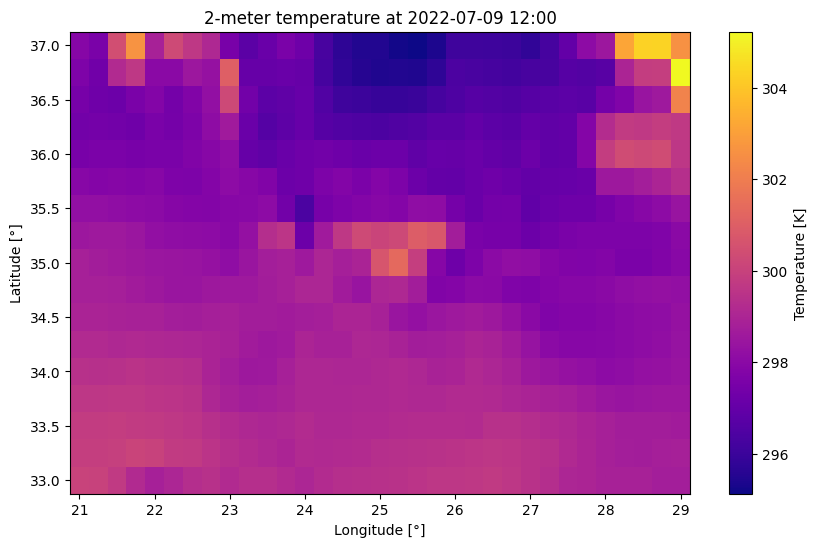

In [4]:
# The first of the two plots we produce is the map of temperature for a specific time step.
# Let's see what time steps are available
print('Available time steps: ', time_array)

# In this case, the time steps are stored as hours since 1900-01-01 00:00 (as explained by the information about the "time variable" printed previouly)
# Let us convert the values in a more easily readable format, using the "datetime" library
# As a starting point, we can convert a single value of the time_array to a readable format is we sum its values in hours to the reference start date of 1900-01-01
reference_start_date = datetime.datetime(1900, 1, 1, 0, 0) # <- the reference start date of 1900-01-01
first_time_steps_as_hour_difference = datetime.timedelta(hours = int(time_array[0])) # <- the time difference in hours
first_time_step = reference_start_date + first_time_steps_as_hour_difference
print('The first entry in the time array correspond to the date and time: ', first_time_step)
# We can repeat the process for all entry in the array, using a "for" loop
time_array_converted = [reference_start_date + datetime.timedelta(hours=int(t)) for t in time_array]
print('All the available date and time steps are:\n', time_array_converted)

# Let's pick a time step for our analysis. For this example, let's pick the 2022-07-09 at 12:00, which is the fifth entry in the time array.
chosen_time_index = 4 
chosen_date_time = time_array_converted[chosen_time_index]

# When we displayed the information available on the temperature variables, we saw that its dimensions are (time, latitude, longitude).
# Therefore, to select the first time step, we will have to select the time index across the first dimension of the array
t2m_at_chosen_time = t2m_array[chosen_time_index, :, :]
print('\nAt the chosen time step, the temperature array has the following shape: ', t2m_at_chosen_time.shape, '\n')

# At a fixed time step, the temperature array has 2 dimensions: latitude and longitude.
# We can visualize how the 2-meter temperature varies across space in a map, with latitude and longitude on the x and y axis of a figure.
# Let's first create the figure and the axis
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()

# Let us chose a colormap for the temperature
# You can find a list of colormaps at: https://matplotlib.org/stable/tutorials/colors/colormaps.html
cmap = 'plasma'

# To visualize 2-dimensional maps, we can use "pcolormesh"
mappable = ax.pcolormesh(lon_array, lat_array, t2m_at_chosen_time, cmap=cmap) # <- we added a ".T" to the temperature array to transpose it, since we want the longitude on the x-axis

# We can add information to the map in the form of labels and a title
ax.set_xlabel('Longitude [°]')
ax.set_ylabel('Latitude [°]')
ax.set_title('2-meter temperature at %s' % chosen_date_time.strftime('%Y-%m-%d %H:%M')) # <- "strftime" is a function to format the date/time in a custom string

# To see what color correspond to each temperature value, we can display a colorbar
plt.colorbar(mappable=mappable, label='Temperature [K]')
pass # <- we add it just that so jupyter does not write colorbar (i.e. the last command we called) info at screen, which can be distracting

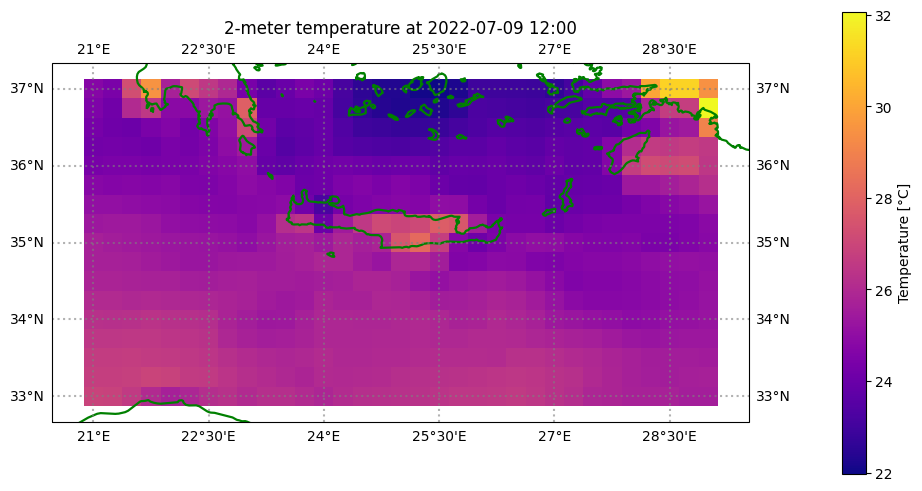

In [5]:
# We can try to make the figure more "understandable" by:
# - adding the coastlines
# - showing the temperature in degree Celsius

# Converting the temperature in Celsius
t2m_celsius_at_chosen_time = t2m_at_chosen_time - 273.15

# Let's create a new figure
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree()) # <- to display the coastline, we need to define a gregraphic projection

# Same steps as before for displaying the data
cmap = 'plasma'
mappable = ax.pcolormesh(lon_array, lat_array, t2m_celsius_at_chosen_time, cmap=cmap)
ax.set_title('2-meter temperature at %s' % chosen_date_time.strftime('%Y-%m-%d %H:%M'))

# We can visualize the coastiline above the data (since we defined a projection when creating the axis)
ax.coastlines(color='green', linewidth=1.6)

# Unfortunately cartopy, which allows us to see the coastline, will disable the functions that control the axis labels.
# We need to use instead a function that is defined in cartopy, that provides gridlines and labels for the axis.
# More information on the function available at: https://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle=':', linewidth=1.5, color='gray', alpha=0.6)

# Let's remember to change the label of the colorbar!
plt.colorbar(mappable=mappable, label='Temperature [°C]', pad=0.1) # <- we added a "pad" parameter to move a bit the colorbar to the right, otherwise it overlaps with the labels
pass # <- we add it just that so jupyter does not write colorbar (i.e. the last command we called) info at screen, which can be distracting

Longitude varies between 21.0 and 29.0 degrees East
Laztitude varies between 33.0 and 37.0 degrees East

All longitude values available:  [21.   21.25 21.5  21.75 22.   22.25 22.5  22.75 23.   23.25 23.5  23.75
 24.   24.25 24.5  24.75 25.   25.25 25.5  25.75 26.   26.25 26.5  26.75
 27.   27.25 27.5  27.75 28.   28.25 28.5  28.75 29.  ]

All latitude values available:  [37.   36.75 36.5  36.25 36.   35.75 35.5  35.25 35.   34.75 34.5  34.25
 34.   33.75 33.5  33.25 33.  ]
At the coordinates (lat=35.2, lon=21.5), the 2-meter temperature array has the following shape:  (12,)

The closest indices of our lat/lon grid to the coordinates of Heraklion are:  17 7
These indexes correspond to: latitude = 35.250000, longitude = 25.250000



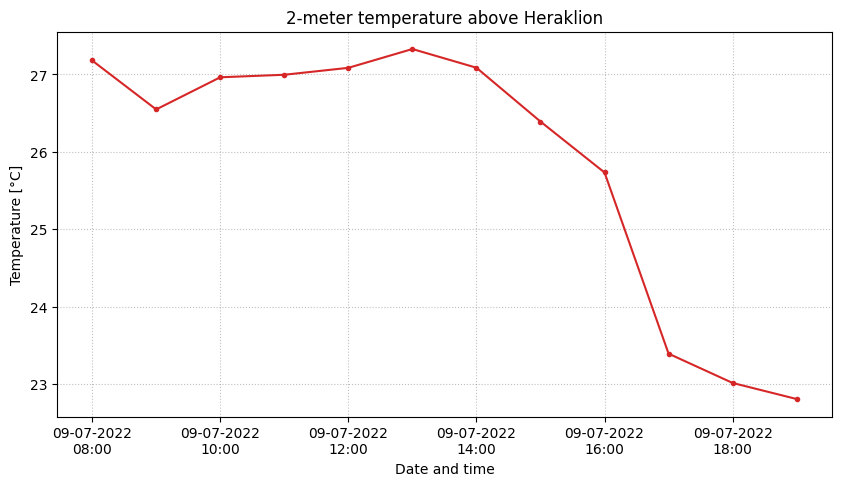

In [6]:
# We can now move to the next topic: how to display a varibale at a single point for multiple time steps.

# Let us select a set of coordinates.
# First, let's see the range of latitude and longitude
print('Longitude varies between %.1f and %.1f degrees East' % (lon_array.min(), lon_array.max()))
print('Laztitude varies between %.1f and %.1f degrees East' % (lat_array.min(), lat_array.max()))
# The full set of values for each coordinate can be displayed as follows:
print('\nAll longitude values available: ', lon_array)
print('\nAll latitude values available: ', lat_array)

# In this case we have few values, so we can select them manually by counting the index.
# Let's say we want to choose the point with lon=21.5 and lat = 35.25, we would simply count the index (starting from 0 at the first place in the array), and obtain:
i_lon = 2
j_lat = 7
# And we could use these indexes to select a time-series of temperature at that point.
# Remembering that the dimension of the 2-meter temperature variable are (time, latitude, longitude), we know that the two indexes will occupy the last two poistions:
time_series_t2m = t2m_array[:, j_lat, i_lon]
# And we can check how many time steps we have available for the analysis at this point:
print('At the coordinates (lat=%.1f, lon=%.1f), the 2-meter temperature array has the following shape: ' % (lat_array[j_lat], lon_array[i_lon]), time_series_t2m.shape) 

# However, if you have a large number of points in your lat/lon grid, it may be difficult to select and index manually.
# If you know the coordinates of the point you want to look at, you can find the oint of the grid closest to your desired point.

# Let's say you want to look at the point closest to Heraklion, the administrative capital of the island of Crete.
# Its coordinates in decimal units are:
lon_desired = 25.134444
lat_desired = 35.340278 # source: https://geohack.toolforge.org/geohack.php?pagename=Heraklion&params=35_20_25_N_25_8_4_E_region:GR_type:city(173993)

# The indexes in our lat and lon array closest to these points are:
i_lon_heraklion = np.argmin(np.abs(lon_array - lon_desired)) # <- basically the minimum of the absolute difference in longitude
j_lat_heraklion = np.argmin(np.abs(lat_array - lat_desired))
print('\nThe closest indices of our lat/lon grid to the coordinates of Heraklion are: ', i_lon_heraklion, j_lat_heraklion)
print('These indexes correspond to: latitude = %f, longitude = %f\n' % (lat_array[j_lat_heraklion], lon_array[i_lon_heraklion]))

# We can now extract a time series above this grid point
time_series_t2m_Heraklion = t2m_array[:, j_lat_heraklion, i_lon_heraklion]
# Let's convert it to Celsius
time_series_t2m_celsius_Heraklion = time_series_t2m_Heraklion - 273.15

# We can now visualize this time series in a figure
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()

# To plot one variable against another (in our case, temperature at 1 grid point vs time), we use the "plot" function
# We use the array of time steps converted to "datetime" format that we defined before, and put it on the x-axis
ax.plot(time_array_converted, time_series_t2m_celsius_Heraklion, marker='.', color='tab:red')

# As before, we add information to the plot in form of axis and labels
ax.set_xlabel('Date and time')
ax.set_ylabel('Temperature [°C]')
ax.set_title('2-meter temperature above Heraklion')

# We can also add a grid, and put it below the plot line
ax.set_axisbelow(True)
ax.grid(ls=':', c='gray', alpha=0.5)

# Since the automatic formatting on the x-axis can be a bit weird, we can manually define one:
date_format_xaxis = mdates.DateFormatter('%d-%m-%Y\n%H:%M')
ax.xaxis.set_major_formatter(date_format_xaxis)

## 3. Performing simple statistics with the variables

We will use some functions from the numpy library to:
- extract specific regions from the 2-meter temperature field
- compute simple statistics on these values, to summarize the information within each region
- perform a simple comparison between the 2-meter temperature values in two different regions

The size of the 2-dimensional latitude and longitude arrays are:  (17, 33) (17, 33)

The islands region contains 65 points. The size of the boolean array that contains the conditions is:  (17, 33)
The sea region contains 65 points. The size of the boolean array that contains the conditions is:  (17, 33)

Number of valid latitudes in the island region:  5
Number of valid longitudes in the island region:  13

Number of valid latitudes in the sea region:  5
Number of valid longitudes in the sea region:  13 



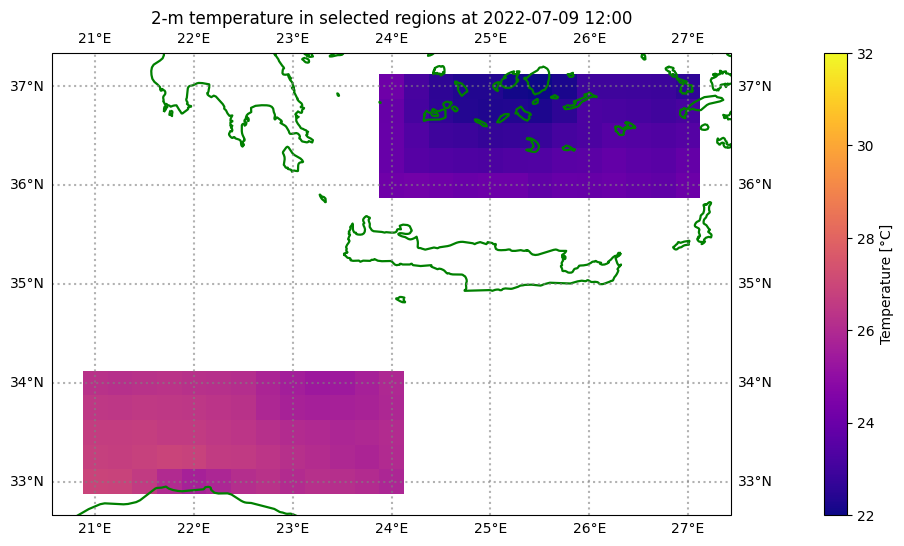

In [7]:
# In the previous section we have worked arrays with a reduced number of dimensions: we either fixed the time, or the lat-lon coordinates.
# This time, we will work with the full 3-dimensional (time, latitude, longitude) array.

# In the current example, our objective is to extract the 2-meter temperature from 2 different regions of the map.
# These regions are:
# - the cluster of small island in the top (north) of the map, between the peloponnese and souther anatolia;
# - the sea in the bottom-left (south-west) corner of the map, above the eastern side of Libya.

# To extract the regions, we first need to define their boundaries:
# - the island region to the north
min_lat_region_islands = 36.0 # The limit to the south
max_lat_region_islands = 37.0 # north
min_lon_region_islands = 24.0 # west
max_lon_region_islands = 27.0 # east
# - the sea region to the south-west
min_lat_region_sea = 33.0 # south
max_lat_region_sea = 34.0 # north
min_lon_region_sea = 21.0 # west
max_lon_region_sea = 24.0 # east

# Before defining the region, we need to create a couple of 2-dimensional array, which contain the latitude and longitude values in a grid.
lon_2d, lat_2d = np.meshgrid(lon_array, lat_array)
print('The size of the 2-dimensional latitude and longitude arrays are: ', lat_2d.shape, lon_2d.shape)
# Note that the sizes printed above are the same as the 2-meter temperature array at a singe time step (the one we showed before in the map).

# With the boundaries, we can now define a set of boolean conditions. These will be two 2-dimensional array, one for each region, having the values:
# - "True" at the indices of the array that are within the region
# - "False" for the ones outside.
conditions_within_region_islands = np.logical_and(np.logical_and(lon_2d >= min_lon_region_islands, lon_2d <= max_lon_region_islands),
                                                  np.logical_and(lat_2d >= min_lat_region_islands, lat_2d <= max_lat_region_islands)) # (note that when you're within parenthesis, the code can continue at the next line)
print('\nThe islands region contains %d points. The size of the boolean array that contains the conditions is: ' % conditions_within_region_islands.sum(), conditions_within_region_islands.shape)
conditions_within_region_sea = np.logical_and(np.logical_and(lon_2d >= min_lon_region_sea, lon_2d <= max_lon_region_sea),
                                                  np.logical_and(lat_2d >= min_lat_region_sea, lat_2d <= max_lat_region_sea)) # (note that when you're within parenthesis, the code can continue at the next line)
print('The sea region contains %d points. The size of the boolean array that contains the conditions is: ' % conditions_within_region_sea.sum(), conditions_within_region_sea.shape)

# We can see how many latitude and longitude points are within each region, by summing its content along the two axes.
# (in a sum, boolean values are treated as integers: True becomes 1, False becomes 0)
# Since we are working with rectangular regions, we can just pick the maximum value of the sum
num_valid_lon_islands_region = np.sum(conditions_within_region_islands, axis = 1).max()
num_valid_lat_islands_region = np.sum(conditions_within_region_islands, axis = 0).max()
print('\nNumber of valid latitudes in the island region: ', num_valid_lat_islands_region)
print('Number of valid longitudes in the island region: ', num_valid_lon_islands_region)
num_valid_lon_sea_region = np.sum(conditions_within_region_sea, axis = 1).max()
num_valid_lat_sea_region = np.sum(conditions_within_region_sea, axis = 0).max()
print('\nNumber of valid latitudes in the sea region: ', num_valid_lat_sea_region)
print('Number of valid longitudes in the sea region: ', num_valid_lon_sea_region, '\n')

# We can use these two conditions matrices for simply extracting the temperature values, without performing any statistics (for the moment)
# The first step is the creation of empty arrays to store the 2-meter temperature value of each region.
# We will use "nan" (= not a number) values to denote empty positions in the array
t2m_islands_region = np.full((time_array.shape[0], num_valid_lat_islands_region, num_valid_lon_islands_region), np.nan)
# We can fill the empty container by looping over time
for index_time in range(time_array.shape[0]):
    # At each time step, we select the 2-meter temperature from the whole map at that time step
    t2m_at_current_time = t2m_array[index_time, :]
    # And we assign this value to the container at the same time step
    t2m_islands_region[index_time, :] = t2m_at_current_time[conditions_within_region_islands].reshape(num_valid_lat_islands_region, num_valid_lon_islands_region)

# And we repeat the procedure for the sea region
t2m_sea_region = np.full((time_array.shape[0], num_valid_lat_sea_region, num_valid_lon_sea_region), np.nan)
for index_time in range(time_array.shape[0]):
    t2m_at_current_time = t2m_array[index_time, :]
    t2m_sea_region[index_time, :] = t2m_at_current_time[conditions_within_region_sea].reshape(num_valid_lat_sea_region, num_valid_lon_sea_region)

# Let us visualize the regions that we extracted.
# Since we have a 2-dimensional array at each time step, we have to select a specific time step for the plot.
# Let's select the same one we used in the previous example, so we can compare the temperature value to make sure that we selected the correct regions.
t2m_islands_region_at_chosen_time = t2m_islands_region[chosen_time_index, :, :]
t2m_sea_region_at_chosen_time = t2m_sea_region[chosen_time_index, :, :]
# We also conver them to Celsius
t2m_celsius_islands_region_at_chosen_time = t2m_islands_region_at_chosen_time - 273.15
t2m_celsius_sea_region_at_chosen_time = t2m_sea_region_at_chosen_time - 273.15

# We also need to define the lat and lon array for the two regions, so that we have the coordinates for the plot
lon_2d_islands_region = lon_2d[conditions_within_region_islands].reshape(num_valid_lat_islands_region, num_valid_lon_islands_region)
lat_2d_islands_region = lat_2d[conditions_within_region_islands].reshape(num_valid_lat_islands_region, num_valid_lon_islands_region)
lon_2d_sea_region = lon_2d[conditions_within_region_sea].reshape(num_valid_lat_sea_region, num_valid_lon_sea_region)
lat_2d_sea_region = lat_2d[conditions_within_region_sea].reshape(num_valid_lat_sea_region, num_valid_lon_sea_region)

# Creating the figure as before
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree()) # <- same gregraphic projection
cmap = 'plasma'

# SInce the two regions are displayed independently, to ensure that the colorbar is the same between the two, we have to decide manually the limits
t2m_min_in_plot = 22 # deg. Celsius
t2m_max_in_plot = 32 # deg. Celsius

# We have to call the "pcolormesh" function twice, once for each region
mappable = ax.pcolormesh(lon_2d_islands_region, lat_2d_islands_region, t2m_celsius_islands_region_at_chosen_time, cmap=cmap, vmin=t2m_min_in_plot, vmax=t2m_max_in_plot)
mappable = ax.pcolormesh(lon_2d_sea_region, lat_2d_sea_region, t2m_celsius_sea_region_at_chosen_time, cmap=cmap, vmin=t2m_min_in_plot, vmax=t2m_max_in_plot)

# Adding the same extra info as before
ax.set_title('2-m temperature in selected regions at %s' % chosen_date_time.strftime('%Y-%m-%d %H:%M'))
ax.coastlines(color='green', linewidth=1.6)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle=':', linewidth=1.5, color='gray', alpha=0.6)
plt.colorbar(mappable=mappable, label='Temperature [°C]', pad=0.1)
pass # <- we add it just that so jupyter does not write colorbar (i.e. the last command we called) info at screen, which can be distracting

Shape of the array containing the mean 2-meter temperature in the islands region:  (12,)
Shape of the array containing the mean 2-meter temperature in the sea region:  (12,) 

Shape of the array containing the standard deviation of the 2-meter temperature in the islands region:  (12,)
Shape of the array containing the standard deviation of the 2-meter temperature in the sea region:  (12,) 



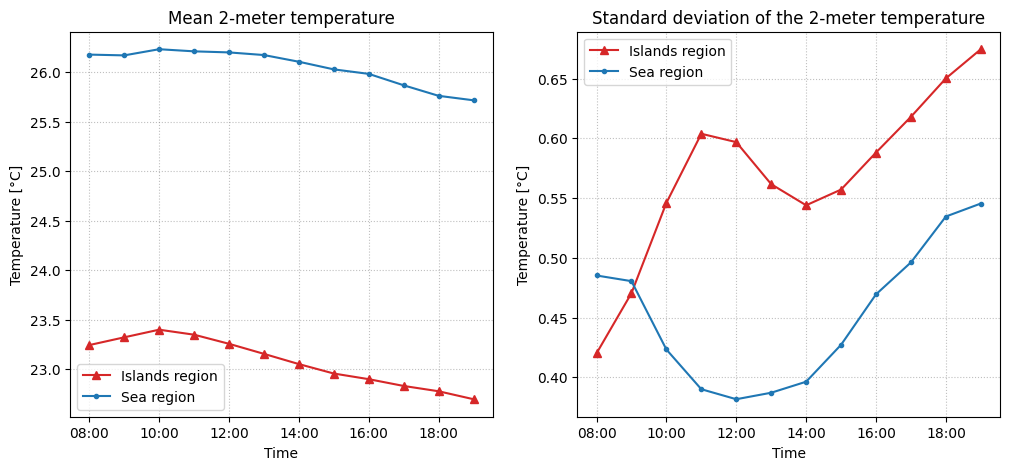

In [8]:
# Now that we have the regions, we can extract some statistics from them, to summarize the information at each time steps.
# For this example, we will extract the mean and standard deviation.
# Other possible statistics (e.g. median, quantile) are available in the numpy library, if you want to use them in your project you can find them here: https://numpy.org/doc/stable/reference/routines.statistics.html 
# Since our arrays contain "nan" values, we have to use functions that can handle them safely. For instance, "numpy.nanmean" instead of "numpy.mean".

# Luckily for us, the numpy functions can compute statistics on multiple axis at once:
mean_t2m_islands_region = np.nanmean(t2m_islands_region, axis=(1,2)) # <- averages over axis 1 and 2, which are latitude and longitude
mean_t2m_sea_region = np.nanmean(t2m_sea_region, axis=(1,2))
print('Shape of the array containing the mean 2-meter temperature in the islands region: ', mean_t2m_islands_region.shape)
print('Shape of the array containing the mean 2-meter temperature in the sea region: ', mean_t2m_sea_region.shape, '\n')
std_t2m_islands_region = np.nanstd(t2m_islands_region, axis=(1,2))
std_t2m_sea_region = np.nanstd(t2m_sea_region, axis=(1,2))
print('Shape of the array containing the standard deviation of the 2-meter temperature in the islands region: ', std_t2m_islands_region.shape)
print('Shape of the array containing the standard deviation of the 2-meter temperature in the sea region: ', std_t2m_sea_region.shape, '\n')

# We can now display how the mean and standard deviation for the 2 regions varies in time.
# This time, we will create a figure with multiple panels:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Let us define two different colors, one for each region
color_islands = 'tab:red'
color_sea = 'tab:blue'

# Let us convert again the temperature to Celsius
mean_t2m_celsius_islands_region = mean_t2m_islands_region - 273.15
mean_t2m_celsius_sea_region = mean_t2m_sea_region - 273.15

# On the first axis we show the mean
ax0 = axes[0]
# As in the previous figure, we call the plotting function twice, once for each region
ax0.plot(time_array_converted, mean_t2m_celsius_islands_region, marker='^', color=color_islands, label='Islands region') # <- the label will be used in the legend
ax0.plot(time_array_converted, mean_t2m_celsius_sea_region, marker='.', color=color_sea, label='Sea region')
# We can create a legend, that helps us to distinguish between the two curves
ax0.legend()

# As before, we fnish up the plot with some formatting
ax0.set_xlabel('Time')
ax0.set_ylabel('Temperature [°C]')
ax0.set_title('Mean 2-meter temperature')
ax0.set_axisbelow(True)
ax0.grid(ls=':', c='gray', alpha=0.5)
date_format_xaxis = mdates.DateFormatter('%H:%M')
ax0.xaxis.set_major_formatter(date_format_xaxis)

# On the second axis we show the standard deviation
ax1 = axes[1]

ax1.plot(time_array_converted, std_t2m_islands_region, marker='^', color=color_islands, label='Islands region') # <- the label will be used in the legend
ax1.plot(time_array_converted, std_t2m_sea_region, marker='.', color=color_sea, label='Sea region')

ax1.legend()

ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature [°C]')
ax1.set_title('Standard deviation of the 2-meter temperature')
ax1.set_axisbelow(True)
ax1.grid(ls=':', c='gray', alpha=0.5)
ax1.xaxis.set_major_formatter(date_format_xaxis)

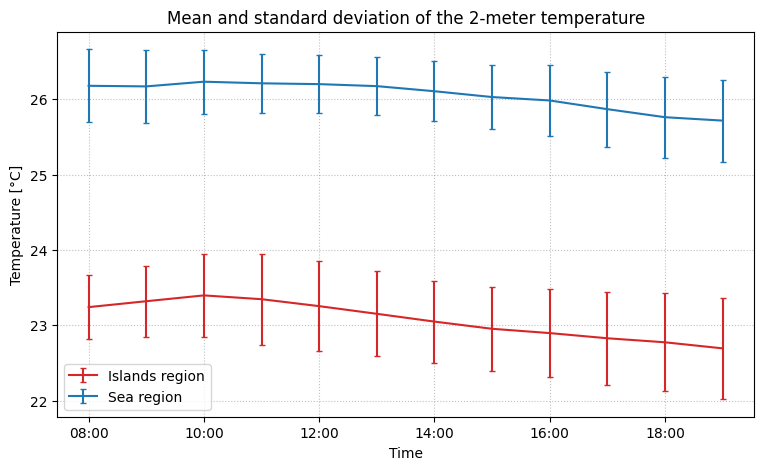

In [9]:
# We can display these types of results in a more compact way.
# This function allow us to show the standard deviation around the mean as an errorbar:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html

fig, ax = plt.subplots(1, 1, figsize=(9, 5))

# Same colors as before
color_islands = 'tab:red'
color_sea = 'tab:blue'

# the function requires the length of the bar along each axis. We will only show a bar on the y axis, around each point, representing the standard deviation
ax.errorbar(time_array_converted, mean_t2m_celsius_islands_region, yerr=std_t2m_islands_region, color=color_islands, capsize=2., label='Islands region') 
ax.errorbar(time_array_converted, mean_t2m_celsius_sea_region, yerr=std_t2m_sea_region, color=color_sea, capsize=2., label='Sea region')
ax.legend()

# As before, we fnish up the plot with some formatting
ax.set_xlabel('Time')
ax.set_ylabel('Temperature [°C]')
ax.set_title('Mean and standard deviation of the 2-meter temperature')
ax.set_axisbelow(True)
ax.grid(ls=':', c='gray', alpha=0.5)
ax.xaxis.set_major_formatter(date_format_xaxis)

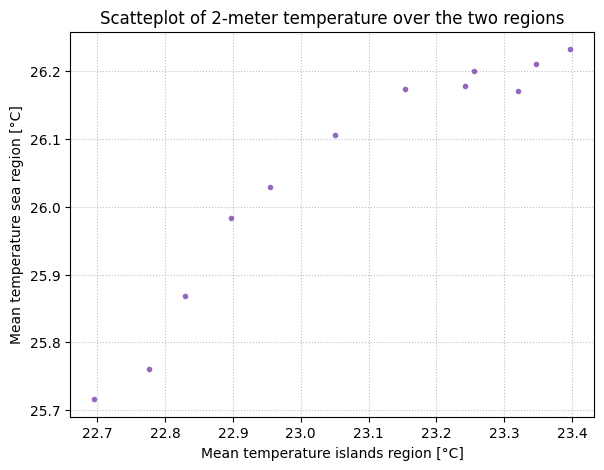

In [10]:
# Looking at the trends of the two mean temperature is not the only way to compare them.
# For example, we can make a scatterplot of the two mean temperatures.
# The structure of the plot is similar to the other ones we made, but we will use a different plotting function
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

# We can inpose that the two axis have equal units
ax.set_aspect('equal')

# the function requires the length of the bar along each axis. We will only show a bar on the y axis, around each point, representing the standard deviation
ax.scatter(mean_t2m_celsius_islands_region, mean_t2m_celsius_sea_region, marker='.', color='tab:purple')

# As before, we fnish up the plot with some formatting
ax.set_xlabel('Mean temperature islands region [°C]')
ax.set_ylabel('Mean temperature sea region [°C]')
ax.set_title('Scatteplot of 2-meter temperature over the two regions')
ax.set_axisbelow(True)
ax.grid(ls=':', c='gray', alpha=0.5)


Linear regression between the mean 2-m temperature over the island region and the 2-temperature over the sea region.
Slope:  0.7139789996251145
Intercept:  9.576257265481942
Pearson correlation coefficient:  0.9517141065321059
p-value:  1.9057964921381864e-06
Standard error of the estimated slope:  0.07282779614851943 



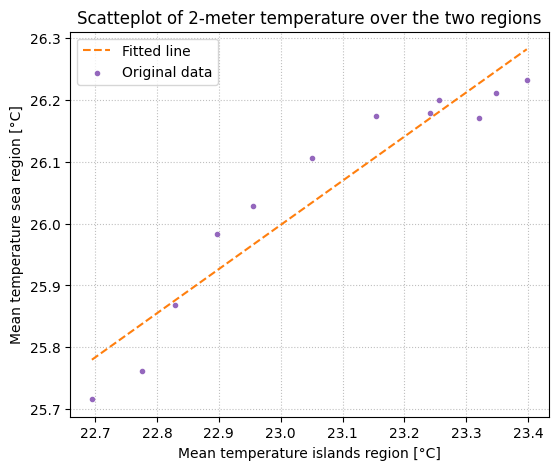

In [11]:
# The points in the previous plot look quite aligned! Let's see what a linear regression between the two sets gives us.
# We will use the scipy library for this task.
# Many other functions (beside the linear regression) are available in scipy, you can have a look at them here: https://docs.scipy.org/doc/scipy/reference/stats.html

# The function is very easy to use: given a series of x (in our case, the mean 2-m temperature over the islands) and y (mean 2-m temperature over the sea), it returns the following information:
# - slope = the slope of the regression line;
# - intercept = the intercept of the regression line;
# - r_value = the Pearson correlation coefficient;
# - p_value = the p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic (alternative tests can be performed);
# - std_error = the standard error of the estimated slope (gradient), under the assumption of residual normality.
slope, intercept, r, p, se = scipy.stats.linregress(mean_t2m_celsius_islands_region, mean_t2m_celsius_sea_region)

# First, we can print these values:
print('Linear regression between the mean 2-m temperature over the island region and the 2-temperature over the sea region.')
print('Slope: ', slope)
print('Intercept: ', intercept)
print('Pearson correlation coefficient: ', r)
print('p-value: ', p)
print('Standard error of the estimated slope: ', se, '\n')

# We can visualize the curve associated to the computed slope and intercept over the scatterplot we produced in the previous figure
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.set_aspect('equal')


# BuPlottig first the fitted line, so it appears "below" the points
# We first define an array "x" that contains the values on the x-axis in order
x_array_for_plotting_fit = np.sort(mean_t2m_celsius_islands_region)
ax.plot(x_array_for_plotting_fit, intercept + slope*x_array_for_plotting_fit, 'tab:orange', ls='--', label='Fitted line')

# Plotting the points exactly as before
ax.scatter(mean_t2m_celsius_islands_region, mean_t2m_celsius_sea_region, marker='.', color='tab:purple', label='Original data')

# And we add a legend
ax.legend()

# As before, we fnish up the plot with some formatting
ax.set_xlabel('Mean temperature islands region [°C]')
ax.set_ylabel('Mean temperature sea region [°C]')
ax.set_title('Scatteplot of 2-meter temperature over the two regions')
ax.set_axisbelow(True)
ax.grid(ls=':', c='gray', alpha=0.5)